In [97]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [98]:
from fastai.vision import *
from fastai.metrics import error_rate

In [99]:
path = Path('/Users/mandeep/abc/chest_xray')
path_train = Path('/Users/mandeep/abc/chest_xray/train')
path_val = Path('/Users/mandeep/abc/chest_xray/valid')
path_test = Path('/Users/mandeep/abc/chest_xray/test')
pathlist = ['train','valid','test']

In [100]:
classes = ['PNEUMONIA','NORMAL']

In [101]:
for i in pathlist:
    for c in classes:
        print(i +" - " + c)
        verify_images(path/i/c, delete=True, max_size=500)

In [106]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=24).normalize(imagenet_stats)


In [107]:
# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [108]:
data.classes

['NORMAL', 'PNEUMONIA']

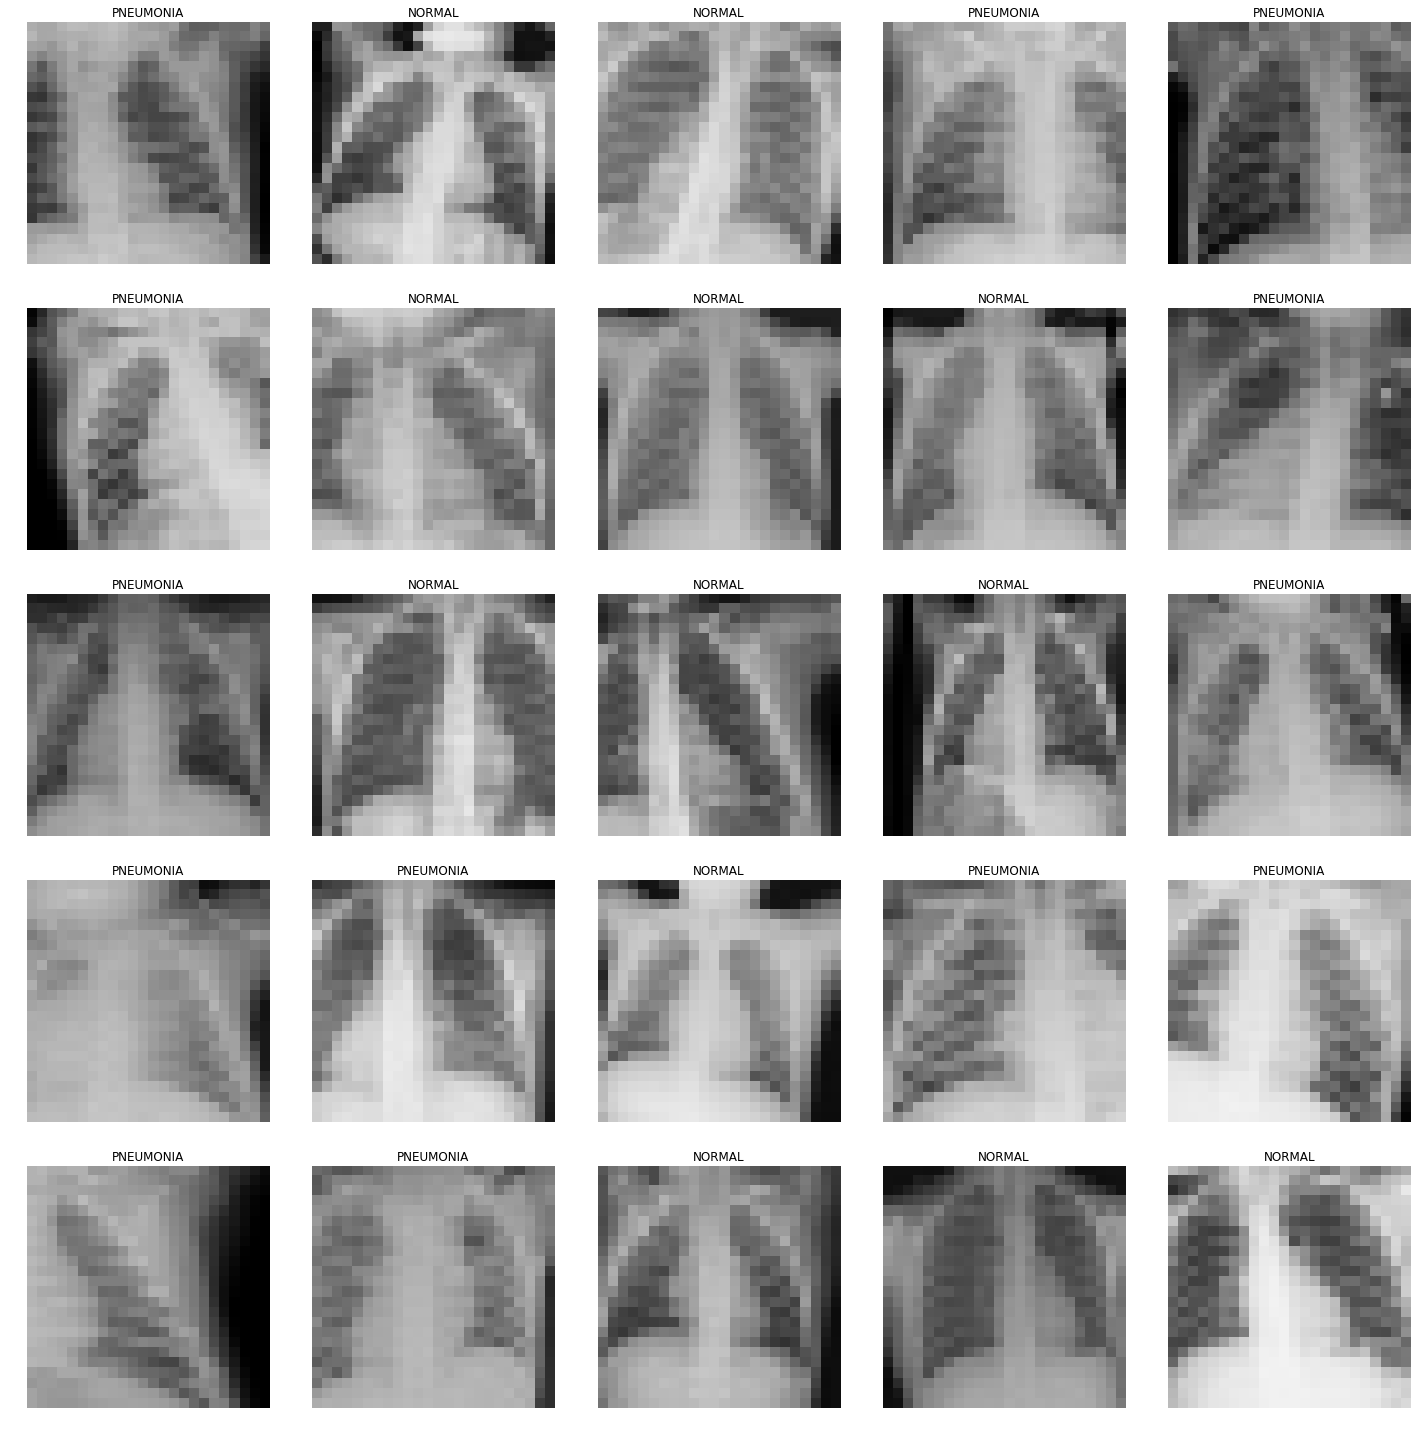

In [109]:
data.show_batch()

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

# Train Model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')